In [1]:
!pip install yfinance


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 2.1 MB/s eta 0:00:02
     ---------- ----------------------------- 0.8/3.0 MB 1.9 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/3.0 MB 1.9 MB/s eta 0:00:02
     -------------------- ------------------- 1.6/3.0 MB 1.8 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 1.8 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 1.7 MB/s eta 0:00:01
     -------------------------------------- - 2.9/3.0 MB 1.8 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 1.8 MB/s  0:00:01
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with stat

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf 

In [3]:
usd_inr=yf.download("USDINR=X", start="2023-01-01" ,end="2023-01-31", interval="1d")

C:\Users\user\AppData\Local\Temp\ipykernel_30732\3756461546.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usd_inr=yf.download("USDINR=X", start="2023-01-01" ,end="2023-01-31", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [4]:
usd_inr=usd_inr[['Close']]
usd_inr.reset_index(inplace=True)
usd_inr.columns=['Date','USD_INR']
usd_inr


,Date,USD_INR
0,2023-01-02,82.749802
1,2023-01-03,82.706001
2,2023-01-04,82.785698
3,2023-01-05,82.666496
4,2023-01-06,82.645203
5,2023-01-09,82.273399
6,2023-01-10,82.180099
7,2023-01-11,81.637398
8,2023-01-12,81.631798
9,2023-01-13,81.115601


In [5]:
# usd_inr.rename(columns={'Close': 'RS'}, inplace=True)



values = [
    4849.93, 4897.09, 4929.33, 4871.70, 4938.68,
    4945.03, 4928.46, 4925.44, 4947.32, 5010.42,
    5029.53, 5003.19, 4984.24, 5007.47, 5018.57,
    5062.54, 5082.37, 5098.39, 5052.74, 5051.36
]


usd_inr_20 = usd_inr.head(20)
usd_inr_20["Gold_Price"] = values
usd_inr_20


C:\Users\user\AppData\Local\Temp\ipykernel_30732\1092401362.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usd_inr_20["Gold_Price"] = values


,Date,USD_INR,Gold_Price
0,2023-01-02,82.749802,4849.93
1,2023-01-03,82.706001,4897.09
2,2023-01-04,82.785698,4929.33
3,2023-01-05,82.666496,4871.70
4,2023-01-06,82.645203,4938.68
5,2023-01-09,82.273399,4945.03
6,2023-01-10,82.180099,4928.46
7,2023-01-11,81.637398,4925.44
8,2023-01-12,81.631798,4947.32
9,2023-01-13,81.115601,5010.42


EDA


{'whiskers': [<matplotlib.lines.Line2D at 0x21bbbef4dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x21bbbef52b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21bbbef4a70>],
 'medians': [<matplotlib.lines.Line2D at 0x21bbbef58b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21bbbef5b80>],
 'means': []}

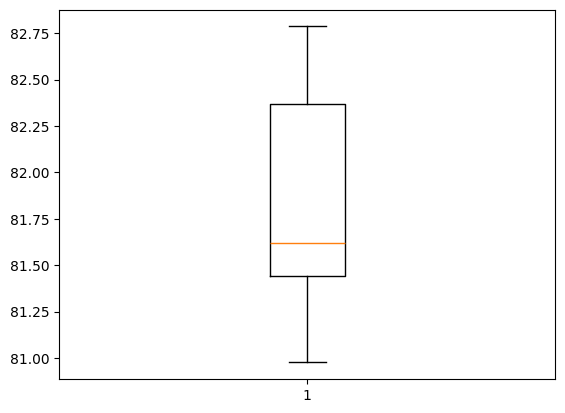

In [6]:
import matplotlib.pyplot as plt
plt.boxplot(usd_inr_20['USD_INR'])

Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
x = usd_inr_20[['USD_INR']]
y = usd_inr_20['Gold_Price']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=42)

STANDAERTIDAtION


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale= scaler.transform(x_test)
x_train_scale
x_test_scale

array([[-1.41206477],
       [ 1.59611111],
       [-0.27174251],
       [ 0.84389136],
       [-0.2355656 ],
       [ 1.52741875],
       [-0.49621978],
       [-0.52178374],
       [-0.61220612],
       [ 1.73468977],
       [-1.16931995],
       [-0.59637955],
       [ 1.4903928 ],
       [-0.4565804 ],
       [-0.26200513],
       [-0.88693574],
       [-0.95335957],
       [ 0.68165907]])

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scale, y_train)

LinearRegression()

In [39]:
model.get_params()
m=model.coef_
b=model.intercept_

# y_pred = model.predict(x_test_scale)
y= m * x_test_scale + b
y


array([[4900.97477484],
       [4998.31417682]])

In [40]:
y_test

0     4849.93
17    5098.39
Name: Gold_Price, dtype: float64

In [41]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [42]:
from sklearn.model_selection import RandomizedSearchCV
para_grid = {
    'fit_intercept': [True, False],
    
    'copy_X': [True, False],
    'n_jobs': [None, -1]
}
search= RandomizedSearchCV(model,para_grid, n_iter=10, cv=5, random_state=42)
search.fit(x_train_scale, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [None, -1]},
                   random_state=42)

In [43]:
search.best_params_

{'n_jobs': None, 'fit_intercept': True, 'copy_X': True}

In [44]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
para_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'fit_intercept': [True, False],
 }
from sklearn.model_selection import GridSearchCV
grid_search_ridge = GridSearchCV(ridge_model, para_grid_ridge, cv=5)
grid_search_ridge.fit(x_train_scale, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0],
                         'fit_intercept': [True, False]})

In [45]:
grid_search_ridge.best_params_

{'alpha': 10.0, 'fit_intercept': True}

In [ ]:
import pickle
pickle.dump(model, open('linear_regression_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))


array([-48.76711199])

In [63]:
import numpy as np
def predict_gold_price(usd_inr_value):
    scaler_input = scaler.transform(np.array(usd_inr_value).reshape(-1, 1))
    return model.predict(scaler_input)[0]


In [54]:
pip install gradio

  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
   ---------------------------------------- 0.0/63.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/63.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/63.5 MB 2.1 MB/s eta 0:00:31
    --------------------------------------- 1.0/63.5 MB 2.1 MB/s eta 0:00:30
    --------------------------------------- 1.6/63.5 MB 2.0 MB/s eta 0:00:32
   - -------------------------------------- 2.1/63.5 MB 2.1 MB/s eta 0:00:30
   - -------------------------------------- 2.6/63.5 MB 2.2 MB/s eta 0:00:28
   - -------------------------------------- 2.9/63.5 MB 2.2 MB/s eta 0:00:28
   -- ------------------------------------- 3.4/63.5 MB 2.1 MB/s eta 0:00:29
   -- ------------------------------------- 3.7/63.5 MB 2.1 MB/s eta 0:00:29
   -- ------------------------------------- 4.2/63.5 MB 2.1 MB/s eta 0:00:29
   -- ------------------------------------- 4.7/63.5 MB 2.1 MB/s eta 0:00:28
   --- ---------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tokenizers 0.20.1 requires huggingface-hub<1.0,>=0.16.4, but you have huggingface-hub 1.1.4 which is incompatible.
transformers 4.45.2 requires huggingface-hub<1.0,>=0.23.2, but you have huggingface-hub 1.1.4 which is incompatible.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import gradio as gr
demo = gr.Interface(
    fn=predict_gold_price,
    inputs=gr.Number(),
    outputs=gr.Number(),
    title="Gold Price Predictor",
    description="Enter the USD to INR exchange rate to predict the gold price in INR."
)
demo.launch()

* Running on local URL:  http://127.0.0.1:7865
* To create a public link, set `share=True` in `launch()`.


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
